In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sn
from sklearn import preprocessing
from itertools import permutations
import scipy.cluster.hierarchy as hac

# Import The Data

In [2]:
df = pd.read_csv("./data/DF_Daily_Clustering.csv")

### To test our hypothesis we will work with different dataframes. In each data frame we will raise the threshold for our criterion to a successful song, which means, we will raise the number of appearnces in the top 50 list.

In [3]:
low_success_DF = df.loc[df["Top_50_Appearnces"] > 0]

In [4]:
normal_success_DF = df.loc[df["Top_50_Appearnces"] > 25]

In [5]:
high_success_DF = df.loc[df["Top_50_Appearnces"] > 50]

In [6]:
print("Dataframe sizes: ")
print("low - " + str(low_success_DF.shape[0]))
print("normal - " + str(normal_success_DF.shape[0]))
print("high - " + str(high_success_DF.shape[0]))

Dataframe sizes: 
low - 1933
normal - 703
high - 481


### We will reset the indexes and pick the relevant colums for our clustering model

In [7]:
low_success_DF.reset_index(drop=True)
normal_success_DF.reset_index(drop=True)
high_success_DF.reset_index(drop=True)
relevantCol = ['spotify_id',"Position","Artist","Track Name",'Streams',"instrumentalness","danceability","energy","loudness","speechiness","acousticness","liveness","valence","tempo"]
low_success_DF = low_success_DF[relevantCol]
normal_success_DF = normal_success_DF[relevantCol]
high_success_DF = high_success_DF[relevantCol]

# K-means

### Let's check how the K-means model works with all numerical features. We evalueted the performance of the model by its silhouette score.  

In [8]:
range_n_clusters = [2, 3, 4, 5, 6]
l_DF = low_success_DF.drop(columns=['spotify_id',"Track Name","Artist","Position",'Streams'])
n_DF = normal_success_DF.drop(columns=['spotify_id',"Track Name","Artist","Position",'Streams'])
h_DF = high_success_DF.drop(columns=['spotify_id',"Track Name","Artist","Position",'Streams'])
print("K-means on low success DF: ")
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(l_DF)
    silhouette_avg = silhouette_score(l_DF, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
print("---"* 15)
print("K-means on normal success DF: ")
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(n_DF)
    silhouette_avg = silhouette_score(n_DF, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
print("---"* 15)
print("K-means on high success DF: ")
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(h_DF)
    silhouette_avg = silhouette_score(h_DF, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

K-means on low success DF: 
For n_clusters = 2 The average silhouette_score is : 0.592028434473473
For n_clusters = 3 The average silhouette_score is : 0.5600856049286838
For n_clusters = 4 The average silhouette_score is : 0.5448613055295578
For n_clusters = 5 The average silhouette_score is : 0.5347215087176967
For n_clusters = 6 The average silhouette_score is : 0.49574261631782873
---------------------------------------------
K-means on normal success DF: 
For n_clusters = 2 The average silhouette_score is : 0.607901767341847
For n_clusters = 3 The average silhouette_score is : 0.6032810910702713
For n_clusters = 4 The average silhouette_score is : 0.5780016825098185
For n_clusters = 5 The average silhouette_score is : 0.5526649186532503
For n_clusters = 6 The average silhouette_score is : 0.5365553979277184
---------------------------------------------
K-means on high success DF: 
For n_clusters = 2 The average silhouette_score is : 0.6163444638096156
For n_clusters = 3 The averag

#### We can see that the the data frame with the highest threshold gets the best results in most cases, therefore, we will use it for the rest of the session. It's important to notice that these results works in correlation to our hypothesis

# Feature Selection For Better Performance

We will try to reduce the number of features we works with.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F919083D30>,
      dtype=object)

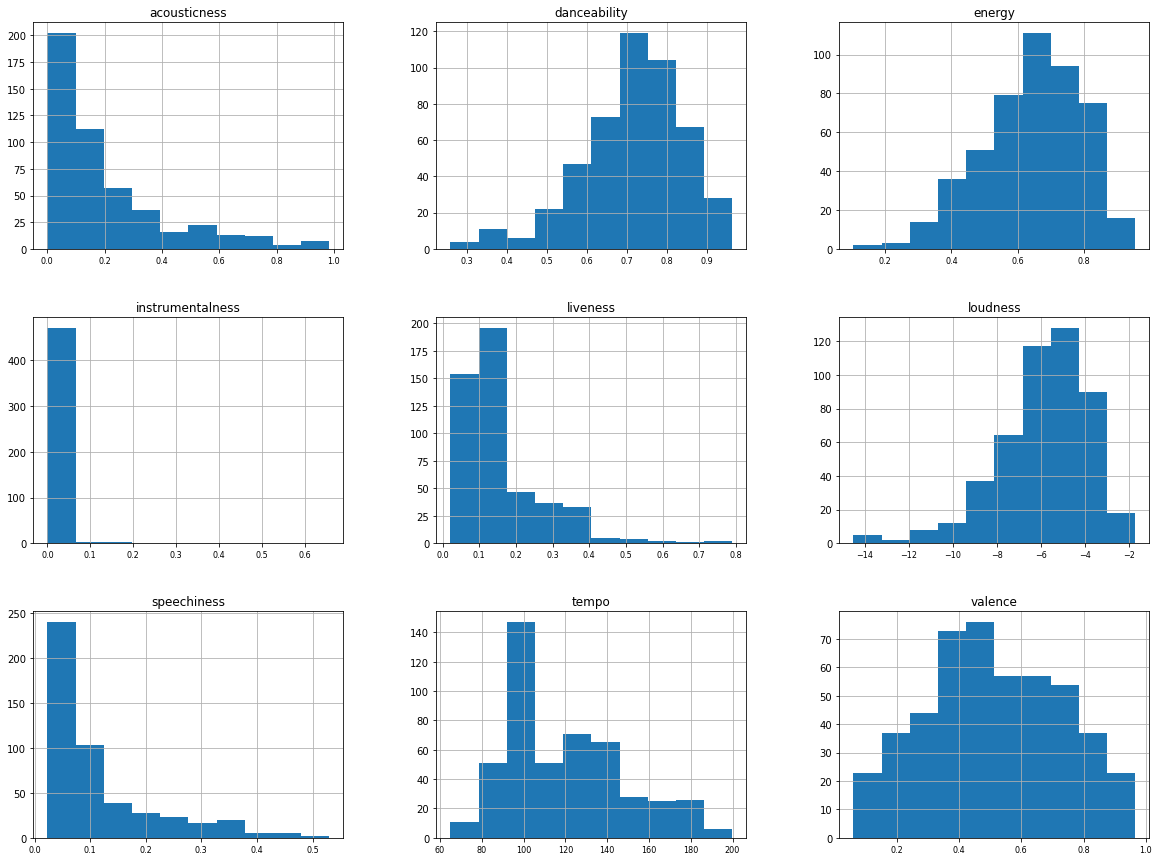

In [9]:
h_DF.hist(xlabelsize=8, figsize=(20,15))

### As we can see, instumentalness won't help us with the clustering as most of its values are equal to 0. We decided to remove it.

In [10]:
h_DF = h_DF.drop(columns=["instrumentalness"])

### Now we will try to find correlations between features using correlation matrix 

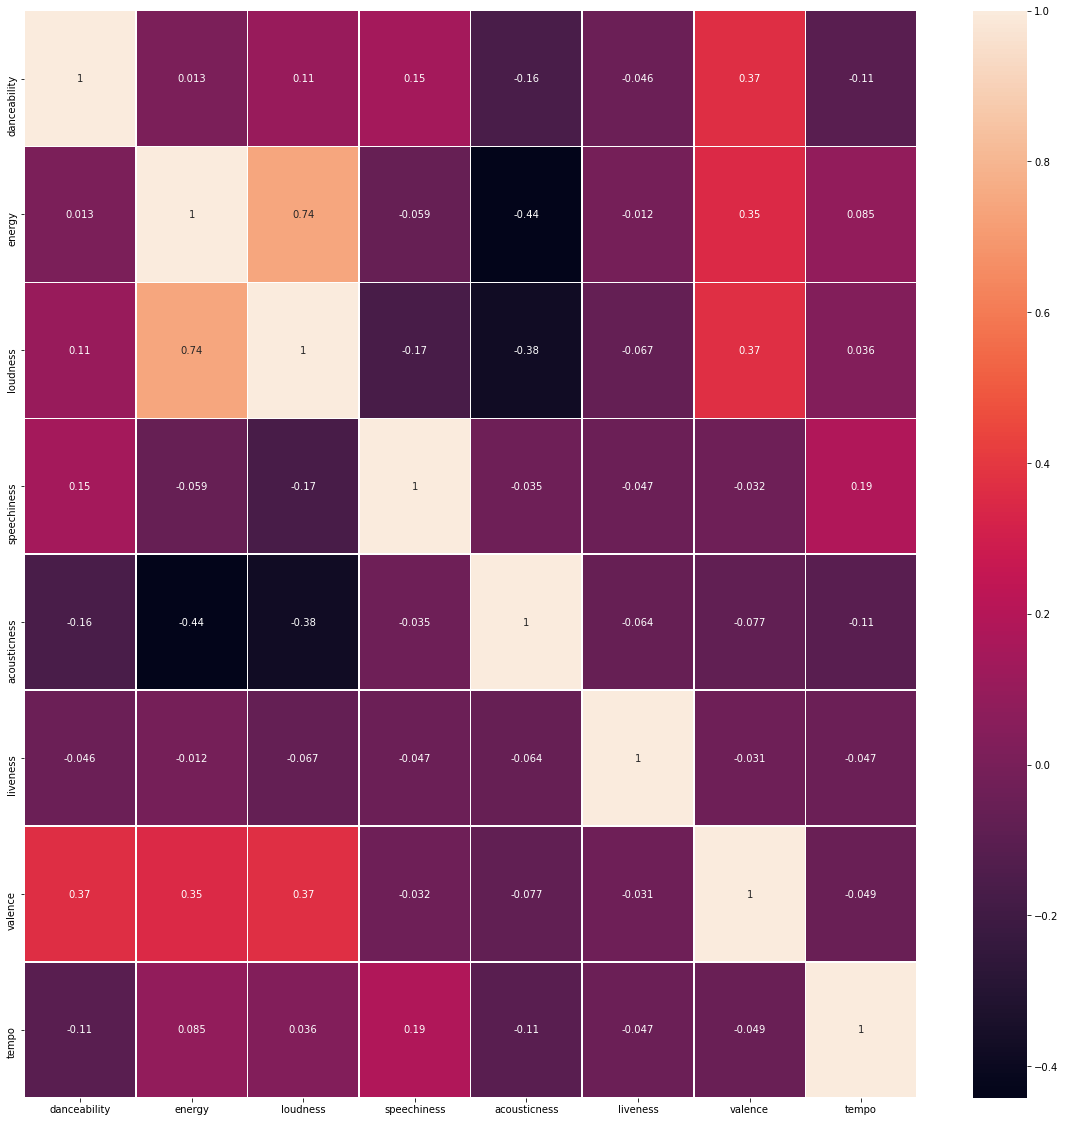

In [11]:
corrMatrix = h_DF.corr()
fig, ax = plt.subplots(figsize=(20,20))        
sn.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)

### We see that the only 2 features with a correlation higher than 0.7 are energy and loudness. More than that, loudness has higher correlation rate with other features so we will try removing it and see how it affect our results.

In [12]:
feature_list = ["danceability","energy","speechiness","acousticness","liveness","valence","tempo"]

In [13]:
test_DF = h_DF[feature_list]
test_DF.reset_index(drop=True)

,danceability,energy,speechiness,acousticness,liveness,valence,tempo
0,0.681,0.594,0.2820,0.16500,0.1340,0.535,186.054
1,0.748,0.524,0.0338,0.41400,0.1110,0.661,95.010
2,0.476,0.718,0.0576,0.07840,0.1220,0.142,199.864
3,0.720,0.763,0.0523,0.40600,0.1800,0.742,101.965
4,0.791,0.619,0.0532,0.00784,0.3510,0.371,103.989
...,...,...,...,...,...,...,...
476,0.856,0.618,0.2860,0.03030,0.0866,0.391,81.993
477,0.781,0.670,0.0452,0.01030,0.0761,0.595,127.990
478,0.640,0.392,0.0574,0.05930,0.0839,0.502,145.838
479,0.716,0.512,0.0331,0.48300,0.0928,0.326,104.957


In [14]:
range_n_clusters = [2, 3, 4, 5, 6]
print("K-means with loudness: ")
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(h_DF)
    silhouette_avg = silhouette_score(h_DF, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

print("K-means without loudness: ")
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(test_DF)
    silhouette_avg = silhouette_score(test_DF, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

K-means with loudness: 
For n_clusters = 2 The average silhouette_score is : 0.6163466237717616
For n_clusters = 3 The average silhouette_score is : 0.6107665818993965
For n_clusters = 4 The average silhouette_score is : 0.5901037428193939
For n_clusters = 5 The average silhouette_score is : 0.5301487084707904
For n_clusters = 6 The average silhouette_score is : 0.5202928090512244
K-means without loudness: 
For n_clusters = 2 The average silhouette_score is : 0.6246425791831217
For n_clusters = 3 The average silhouette_score is : 0.6266783179605118
For n_clusters = 4 The average silhouette_score is : 0.6156967897119212
For n_clusters = 5 The average silhouette_score is : 0.5678981720090023
For n_clusters = 6 The average silhouette_score is : 0.566228989109892


### We can see that we got better results without loudness. Therefore, we will remove it and look for the optimal number of clusters.

In [15]:
h_DF = test_DF

## Determining the cluster size

In [16]:
score_list = []
ranges = [2,3,4,5,6,7,8,9]
for i in range(2,10):
    kmeans_model = KMeans(n_clusters=i, random_state=10).fit(h_DF)
    preds = kmeans_model.predict(h_DF)
    score_list.append(kmeans_model.inertia_)

### Visualization of different cluster size performations

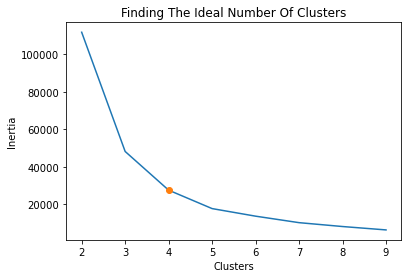

In [17]:
plt.plot(ranges,score_list)
plt.plot([4],[score_list[2]], ls="", marker="o", label="points")
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Finding The Ideal Number Of Clusters')
plt.show()

### We can see that the elbow point is when we use 4 clusters. The elbow point finds the optimal number of clusters with the best inertia score (sum of squared distances of samples to their closest cluster center). When we raise the number of clusters the inertia score will drop. We wanted to find the lowest inertia without compromising the model accuracy - therefore we picked the elbow spot which is 4 clusters.

# Training and Predicting

In [18]:
kmeans_model = KMeans(n_clusters=4, random_state=10).fit(h_DF)
preds = kmeans_model.predict(h_DF)

#### Adding the predictions to the data frames

In [19]:
h_DF['cluster'] = preds
high_success_DF['cluster'] = preds

In [20]:
cluster0 = high_success_DF.loc[high_success_DF["cluster"] == 0].sample(n=15)
cluster1 = high_success_DF.loc[high_success_DF["cluster"] == 1].sample(n=15)
cluster2 = high_success_DF.loc[high_success_DF["cluster"] == 2].sample(n=15)
cluster3 = high_success_DF.loc[high_success_DF["cluster"] == 3].sample(n=15)

#### Grouping clusters to see the averages

In [21]:
clusters = h_DF \
    .groupby('cluster') \
    .agg('mean').style \
    .background_gradient(cmap='RdYlBu', low=.5, high=0)

In [22]:
clusters

,danceability,energy,speechiness,acousticness,liveness,valence,tempo
cluster,,,,,,,
0,0.716459,0.638835,0.106411,0.215825,0.157304,0.525858,94.632505
1,0.651655,0.671121,0.180202,0.179832,0.142914,0.519202,174.881069
2,0.719054,0.623424,0.125271,0.166435,0.161836,0.481004,142.773054
3,0.736496,0.641867,0.092805,0.215482,0.168483,0.504647,120.219230


Let’s interpret our clusters in consideration of the table above. Please note that the characteristics of clusters are deduced by comparing them with each other and thus, they are relative. When we say a cluster includes songs with a low tempo, this phrase does not regarding all music industry.

### Cluster 1

In [23]:
cluster0_present = cluster0[["Artist","Track Name"]]

In [24]:
cluster0_present

,Artist,Track Name
5072,Drake,Toosie Slide
1602,Daddy Yankee,Dura
1844,Rich The Kid,Plug Walk
49,Big Sean,Bounce Back
5716,Camilo,Vida de Rico
3772,Taylor Swift,You Need To Calm Down
352,Maroon 5,Cold
5428,Conan Gray,Heather
4,Drake,One Dance
1189,Post Malone,Candy Paint


#### This is our first cluster with a high value of danceability, high acousticness, high valence and low tempo. We can see many pop  and rnb songs in this cluster

### Cluster 2

In [27]:
cluster1_present = cluster1[["Artist","Track Name"]]

In [28]:
cluster1_present

,Artist,Track Name
1253,Piso 21,Déjala Que Vuelva (feat. Manuel Turizo)
5414,DJ Khaled,POPSTAR (feat. Drake)
1716,Post Malone,rockstar
322,Katy Perry,Chained To The Rhythm
1754,Nicky Jam,X
2934,Justin Bieber,Mistletoe
123,Childish Gambino,Redbone
253,Luis Fonsi,Despacito (Featuring Daddy Yankee)
1055,Post Malone,rockstar
1960,Post Malone,rockstar (feat. 21 Savage)


#### This is our second cluster with a high value of energy, high speechiness, high tempo and low liveness and low danceability. We can see many latin songs in this cluster.

### Cluster 3

In [29]:
cluster2_present = cluster2[["Artist","Track Name"]]

In [30]:
cluster2_present

,Artist,Track Name
3367,Lil Nas X,Old Town Road
1871,Cardi B,I Like It
3292,Jonas Brothers,Sucker
1095,Post Malone,I Fall Apart
276,Martin Garrix,Scared to Be Lonely
4873,Jack Harlow,WHATS POPPIN
472,Kendrick Lamar,HUMBLE.
5554,Drake,Laugh Now Cry Later (feat. Lil Durk)
1085,Macklemore,Glorious (feat. Skylar Grey)
161,Bruno Mars,That's What I Like


#### This is our third cluster with a high value of danceability, high liveness, high acousticness and low speechiness. We can see many hiphop songs in the cluster.

### Cluster 4

In [31]:
cluster3_present = cluster3[["Artist","Track Name"]]

In [32]:
cluster3_present

,Artist,Track Name
650,Selena Gomez,Bad Liar
47,Alok,Hear Me Now
3195,Billie Eilish,bury a friend
2670,Lil Baby,Drip Too Hard (Lil Baby & Gunna)
160,Travis Scott,goosebumps
260,Julia Michaels,Issues
4944,Dua Lipa,Don't Start Now
4635,Surfaces,Sunday Best
478,Maggie Lindemann,Pretty Girl - Cheat Codes X CADE Remix
720,Axwell /\ Ingrosso,More Than You Know


#### This is our third cluster with a high value of danceability, high speechiness, high tempo and low liveness. 

## Hirarcial Clustering

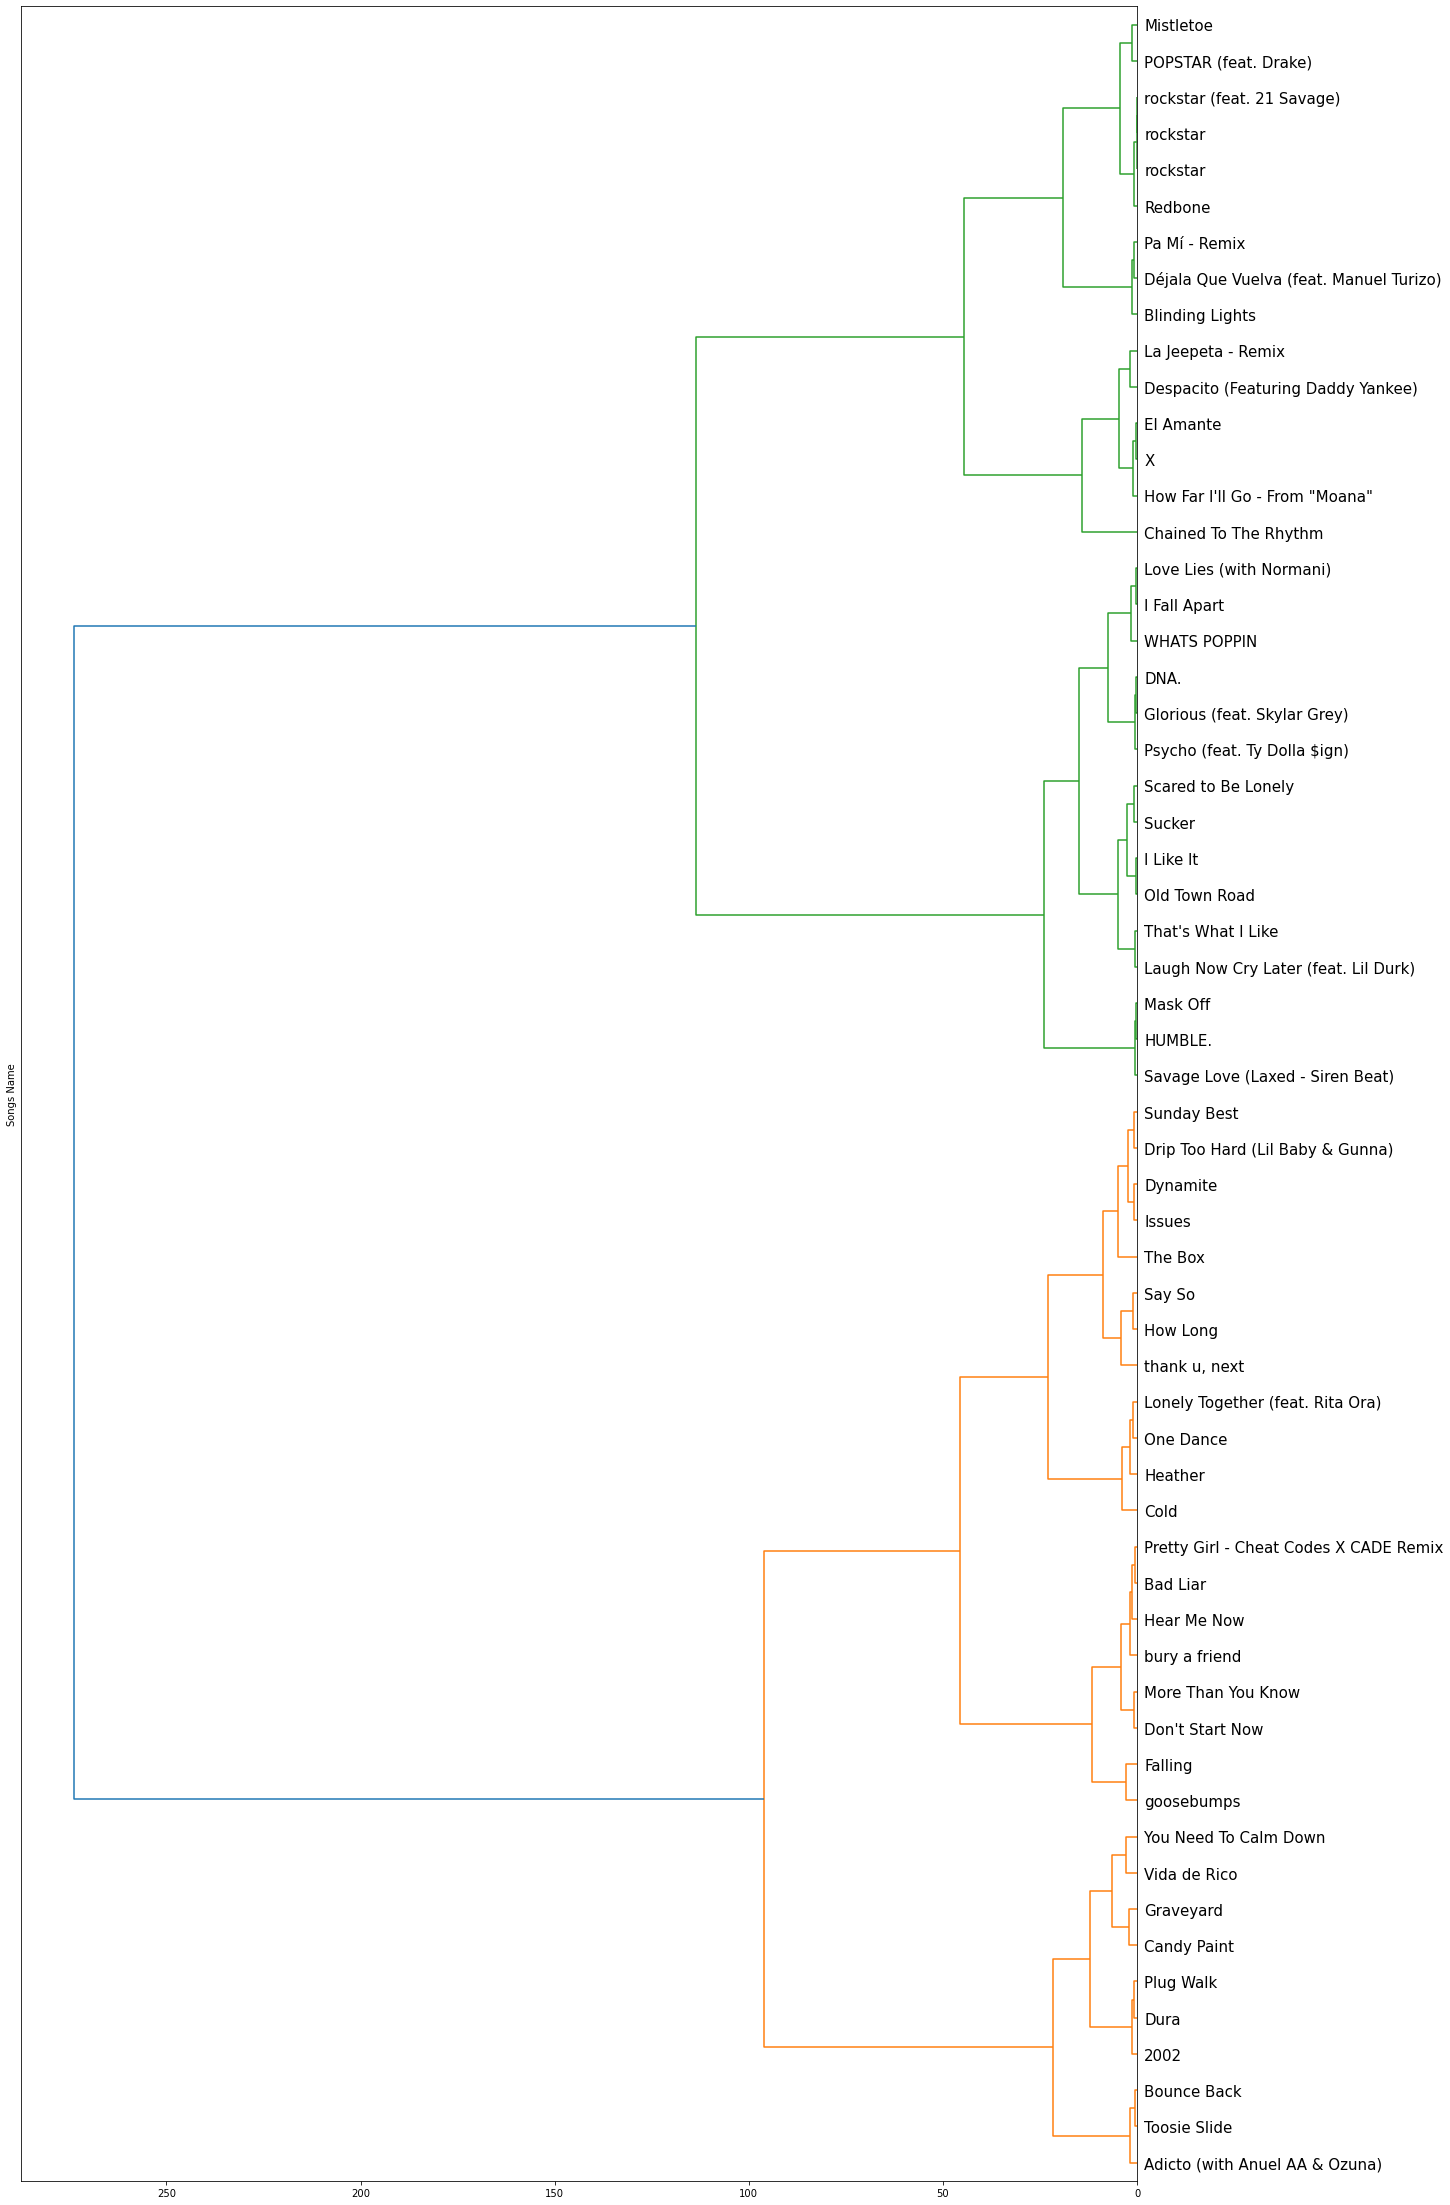

In [36]:
hirarcial_DF = pd.concat([cluster0, cluster1,cluster2 ,cluster3])
relevantCol = ["danceability","energy","speechiness","acousticness","liveness","valence","tempo"]
labels_for = hirarcial_DF["Track Name"].tolist()
# Creating the Hierarchical data 
hierarchicalData = hac.linkage(hirarcial_DF[relevantCol], "ward")

# Dendrogram's legend configuration.
plt.figure(figsize=(20, 40))
plt.ylabel('Songs Name')
hac.dendrogram( Z=hierarchicalData, labels=labels_for,leaf_rotation=0.0, leaf_font_size=15.0, orientation='left')
plt.savefig("./data/HirarcialClustering.png")
plt.show()

### It seems like the hirarcial algorythm sperated our data to the same clusters as K-means did. We can see similar songs in the same sub clusters like DNA, Glorious and Psycho which are all hiphop songs and Despacito, X and El Amante which are all latin songs